In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import feature_extractor as fe
import data_cleaner as dc
# import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import time
import seaborn as sns
import pandas as pd
# import numpy as np
# sys.path.append('../..')
# import omama as O

In [3]:
# cache_path = "/home/ryan.zurrin001/binlink/sample_dataset.pkl"
cache_path = "/home/ryan.zurrin001/binlink/cs438_features_imgs.pkl"

In [4]:
# Load the DataFrame
df_features = pd.read_pickle(cache_path)

In [5]:
len(df_features)

163568

In [6]:
df_features.columns

Index(['path', 'label', 'StudyInstanceUID', 'ImageLaterality',
       'SOPInstanceUID', 'PatientAge', 'Manufacturer', 'ManufacturerModelName',
       'DistanceSourceToDetector', 'DistanceSourceToPatient', 'ExposureTime',
       'XRayTubeCurrent', 'Exposure', 'ExposureInuAs', 'KVP',
       'BodyPartThickness', 'CompressionForce', 'PositionerPrimaryAngle',
       'ViewPosition', 'DetectorTemperature', 'DetectorType',
       'FieldOfViewOrigin', 'Rows', 'Columns', 'PixelSpacing',
       'BreastImplantPresent', 'WindowCenter', 'WindowWidth', 'HalfValueLayer',
       'original_shape', 'shape', 'coords', 'resized_coords', 'score',
       'histogram', 'image'],
      dtype='object')

In [7]:
cleaner = dc.DataCleaner(df_features)

In [8]:
print("Initial length:", len(cleaner.df))

Initial length: 163568


In [9]:
cleaned_df = cleaner.clean_data()

Cleaning data...
drop unnecessary columns
handle missing values
process ages
label encode
map labels
handle missing values
add correctness column
expand and extend columns


Expanding Columns:   0%|          | 0/2 [00:00<?, ?it/s]

Extending Columns:   0%|          | 0/3 [00:00<?, ?it/s]

process and flatten columns
handle missing values


In [10]:
len(cleaned_df)

161299

In [11]:
cleaned_df.columns

Index(['label', 'ImageLaterality', 'PatientAge', 'Manufacturer',
       'ManufacturerModelName', 'DistanceSourceToDetector',
       'DistanceSourceToPatient', 'ExposureTime', 'XRayTubeCurrent',
       'Exposure', 'ExposureInuAs', 'KVP', 'BodyPartThickness',
       'CompressionForce', 'PositionerPrimaryAngle', 'ViewPosition',
       'DetectorTemperature', 'DetectorType', 'Rows', 'Columns', 'score',
       'target_label', 'coords1', 'coords2', 'coords3', 'coords4',
       'resized_coords1', 'resized_coords2', 'resized_coords3',
       'resized_coords4', 'FieldOfViewOrigin1', 'FieldOfViewOrigin2',
       'WindowCenter1', 'WindowCenter2', 'WindowCenter3', 'WindowCenter4',
       'WindowWidth1', 'WindowWidth2', 'WindowWidth3', 'WindowWidth4',
       'histogram_mean', 'histogram_median', 'histogram_std', 'histogram_min',
       'histogram_max', 'histogram_percentile_25', 'histogram_percentile_50',
       'histogram_percentile_75', 'flattened_image_mean',
       'flattened_image_median', 'fla

In [12]:
unique_values = cleaned_df.nunique()

print("Number of unique values per column:")
print(unique_values)

Number of unique values per column:
label                                 2
ImageLaterality                       2
PatientAge                          775
Manufacturer                          6
ManufacturerModelName                29
DistanceSourceToDetector              2
DistanceSourceToPatient              77
ExposureTime                       2480
XRayTubeCurrent                      46
Exposure                            281
ExposureInuAs                      2311
KVP                                  21
BodyPartThickness                   118
CompressionForce                    541
PositionerPrimaryAngle              269
ViewPosition                          4
DetectorTemperature                 765
DetectorType                          2
Rows                                  5
Columns                               6
score                            160895
target_label                          2
coords1                            2641
coords2                            2846
coor

In [13]:
# Assuming `df` is your DataFrame and 'target_label' is your column of interest
count_of_values = cleaned_df['target_label'].value_counts()

# This will print the count of each unique value in the 'target_label' column
print(count_of_values)

0    144767
1     16532
Name: target_label, dtype: int64


In [36]:
for col in non_numeric_columns:
    cleaned_df[col] = pd.to_numeric(cleaned_df[col], errors='coerce')

# Now check the types again
print(cleaned_df.dtypes)


label                              int64
ImageLaterality                    int64
PatientAge                       float64
Manufacturer                       int64
ManufacturerModelName              int64
DistanceSourceToDetector         float64
DistanceSourceToPatient          float64
ExposureTime                       int64
XRayTubeCurrent                    int64
Exposure                           int64
ExposureInuAs                      int64
KVP                              float64
BodyPartThickness                float64
CompressionForce                 float64
PositionerPrimaryAngle           float64
ViewPosition                       int64
DetectorTemperature              float64
DetectorType                       int64
Rows                               int64
Columns                            int64
score                            float64
target_label                       int64
coords1                          float64
coords2                          float64
coords3         

In [38]:
# Check for NaN values
print(cleaned_df.isna().sum())


label                            0
ImageLaterality                  0
PatientAge                       0
Manufacturer                     0
ManufacturerModelName            0
DistanceSourceToDetector         0
DistanceSourceToPatient          0
ExposureTime                     0
XRayTubeCurrent                  0
Exposure                         0
ExposureInuAs                    0
KVP                              0
BodyPartThickness                0
CompressionForce                 0
PositionerPrimaryAngle           0
ViewPosition                     0
DetectorTemperature              0
DetectorType                     0
Rows                             0
Columns                          0
score                            0
target_label                     0
coords1                          0
coords2                          0
coords3                          0
coords4                          0
resized_coords1                  0
resized_coords2                  0
resized_coords3     

In [14]:
# Define your features and target variable
X = cleaned_df.drop('target_label', axis=1)  # all columns except the label
y = cleaned_df['target_label']  # the target variable

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

In [17]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(class_weight=class_weights_dict, random_state=42)
logistic_model.fit(X_train_scaled, y_train)

AttributeError: 'str' object has no attribute 'decode'

In [21]:
len(y_train)

129039

In [23]:
len(X_train_scaled)

129039

In [25]:
print(cleaned_df.dtypes)

label                              int64
ImageLaterality                    int64
PatientAge                       float64
Manufacturer                       int64
ManufacturerModelName              int64
DistanceSourceToDetector          object
DistanceSourceToPatient           object
ExposureTime                      object
XRayTubeCurrent                   object
Exposure                          object
ExposureInuAs                     object
KVP                              float64
BodyPartThickness                float64
CompressionForce                 float64
PositionerPrimaryAngle           float64
ViewPosition                       int64
DetectorTemperature               object
DetectorType                       int64
Rows                              object
Columns                           object
score                            float64
target_label                       int64
coords1                          float64
coords2                          float64
coords3         

In [27]:
# Check for any object or non-numeric types
non_numeric_columns = cleaned_df.select_dtypes(exclude=[np.number]).columns
print("Non-numeric columns:", non_numeric_columns)

Non-numeric columns: Index(['DistanceSourceToDetector', 'DistanceSourceToPatient', 'ExposureTime',
       'XRayTubeCurrent', 'Exposure', 'ExposureInuAs', 'DetectorTemperature',
       'Rows', 'Columns'],
      dtype='object')


In [35]:
for i in range(len(cleaned_df)):
    if type(cleaned_df.iloc[i]["Rows"]) == type(cleaned_df.iloc[0]["Rows"]):
        continue
    else:
        print(f"row {i} is not an int")

In [32]:
type(cleaned_df.iloc[0]["Rows"])

int

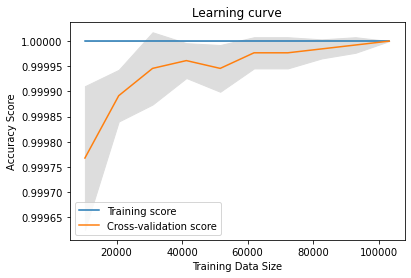

In [21]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    estimator=model, X=X_train_scaled, y=y_train, 
    train_sizes=np.linspace(0.1, 1.0, 10), cv=5, n_jobs=-1, scoring='accuracy'
)

# Calculate mean and standard deviation of train and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')

plt.title('Learning curve')
plt.xlabel('Training Data Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.show()

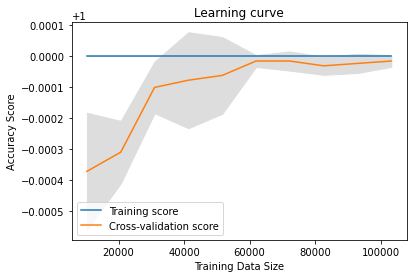

In [26]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    estimator=model, X=X_train_scaled, y=y_train, 
    train_sizes=np.linspace(0.1, 1.0, 10), cv=5, n_jobs=-1, scoring='accuracy'
)

# Calculate mean and standard deviation of train and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')

plt.title('Learning curve')
plt.xlabel('Training Data Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.show()
